### Ch20 Figure 1

In [52]:
# To close out the story, she says something like, "It turns out that the strongest connection we found was that if customers lived within three miles of a gym, they were more likely to buy running shoes."

means = [5,100]  
stds = [3, 60]
corr = -.8
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m = np.random.multivariate_normal(means, covs, 100).T
df = pd.DataFrame(m.transpose(), columns=['miles_from_gym', 'dollars_spent_on_running_shoe'])
df.miles_from_gym = df.miles_from_gym.map(lambda x: 15 if x <= 0 else x)
df.dollars_spent_on_running_shoe = df.dollars_spent_on_running_shoe.map(lambda x: 1 if x <= 0 else x)

df.to_csv('csv_output/ch20_fig1.csv', index=False)
df.head()

,miles_from_gym,dollars_spent_on_running_shoe
0,4.616855,143.110614
1,1.654554,199.665835
2,4.443660,110.838347
3,3.145957,161.046499
4,3.564751,168.292405


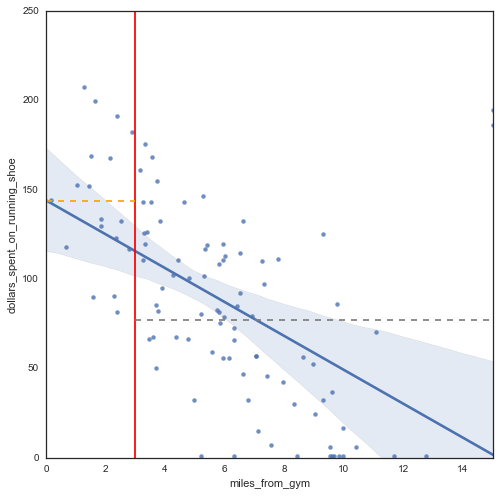

In [1]:
df = pd.read_csv('csv_output/ch20_fig1.csv')

%matplotlib inline
sns.set_style("white")
cm = sns.color_palette('Blues', 2)

f, ax = plt.subplots(1,1, figsize=(8,8))

sns.regplot(df.miles_from_gym, df.dollars_spent_on_running_shoe, ax=ax)
ax.set_ylim(0,250)
ax.set_xlim(0,15)
ax.plot([3, 3], [0, 250], '-', color = 'red')
v = df[df.miles_from_gym<=3].dollars_spent_on_running_shoe.mean()
ax.plot([0, 3], [v, v], '--', color = 'orange')
v = df[df.miles_from_gym>3].dollars_spent_on_running_shoe.mean()
ax.plot([3, 15], [v, v], '--', color = 'grey')

f.savefig('svg_output/ch20_fig1.svg', format='svg')

The orange dash line shows average dollors spent on running shoes of customers live less than 3 miles from gym versus and the grey dash line shows average dollars spent on running shoes of those live 3+ miles from gym. There's also a clear negative corelation between these two variables.